In [47]:
import pandas as pd
import numpy as np

import numpy as np


customer_ids = ['C' + str(i) for i in range(1, 21)]




# Define the data
data = {
    'Week': ['Week1']*1000 + ['Week2']*1000,
    'Supplier': np.random.choice(['S1', 'S2', 'S3'], 2000),
    'Material': np.random.choice(['Met1', 'Met2', 'Met3'], 2000),
    'No_of_Material': np.random.randint(50, 500, 2000),
    'Machine': np.random.choice(['Mach1', 'Mach1', 'Mach1', 'Mach2', 'Mach2', 'Mach3'], 2000),
    'No_of_Product': np.random.randint(50, 400, 2000),
    'Product': np.random.choice(['P1', 'P2', 'P3'], 2000),
    'Customer_id': np.random.choice(customer_ids, 2000)
}

# Create DataFrame
df = pd.DataFrame(data)

# Add Product_Target column
df['Product_Target'] = df['Product'].map({'P1': 0.5*500, 'P2': 0.4*500, 'P3': 0.5*500})

# Add Delivery column
df['Delivery'] = np.where(df['No_of_Product'] >= df['Product_Target'], 'Yes', 'No')

# Add Delayed_Delivery column
df['Delayed_Delivery'] = np.where(df['No_of_Product'] < df['Product_Target'], 'Yes', 'No')


df.loc[(df['Week'] == 'Week2') & (df['Machine']=='Mach3') & (df['Product'] == 'P3'), 'No_of_Product'] *= 0.5
df.loc[(df['Week'] == 'Week2') & (df['Machine']=='Mach2') & (df['Product'] == 'P2'), 'No_of_Product'] *= 0.2
df.loc[(df['Week'] == 'Week2') & (df['Machine']=='Mach2') & (df['Product'] == 'P1'), 'No_of_Product'] *= 0.1

# Ensure the number of products produced is not greater than the number of materials
df['No_of_Product'] = df[['No_of_Material', 'No_of_Product']].min(axis=1)

# Add Delivery Delay Limit column
df['Deli_Delay_Limit'] = df['Product'].map({'P1': 1, 'P2': 2, 'P3': 3})

# Add Extra Delay column
df['Extra_Delay'] =  df['Deli_Delay_Limit'] + 8

# Add Customer_id column
#df['Customer_id'] = 'C' + pd.Series((df.index % 20) + 1).astype(str)

# Reduce the number of P3 products by 50% in the second week
#df.loc[(df['Week'] == 'Week2') & (df['Machine']=='Mach3') & (df['Product'] == 'P3'), 'No_of_Product'] *= 0.5
# Add Customer_Validity column
conditions = [
    (df['Week'] == 'Week1') & (df['Extra_Delay'] >= 10 ),
    (df['Week'] == 'Week2') & (df['Extra_Delay'] > 9),
    (df['Week'] == 'Week1') & (df['Extra_Delay'] <= 11),
    (df['Week'] == 'Week2') & (df['Extra_Delay'] <= 11)
]
choices = ['Not_Existing', 'Not_Existing', 'Existing', 'Existing']
df['Customer_Validity'] = np.select(conditions, choices, default='Not_Existing')

# Print the DataFrame
print(df)

       Week Supplier Material  No_of_Material Machine  No_of_Product Product  \
0     Week1       S2     Met3             453   Mach2          160.0      P1   
1     Week1       S2     Met3             396   Mach2          136.0      P1   
2     Week1       S2     Met3              68   Mach1           68.0      P1   
3     Week1       S1     Met2             227   Mach1          126.0      P3   
4     Week1       S1     Met3              91   Mach2           91.0      P1   
...     ...      ...      ...             ...     ...            ...     ...   
1995  Week2       S2     Met2             202   Mach1          202.0      P2   
1996  Week2       S2     Met2             327   Mach1          296.0      P3   
1997  Week2       S3     Met1             371   Mach1          119.0      P2   
1998  Week2       S1     Met1             103   Mach1          103.0      P1   
1999  Week2       S3     Met2             436   Mach1           72.0      P2   

     Customer_id  Product_Target Delive

Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[ 51.5  44.   40.  130.  161.5  59.5  37.   63.  136.5  63.  149.5  59.5
 128.  123.   70.   25.5 101.5  72.   44.5  93.   32.  107.5 108.5 136.5
  57.   66.5 146.5  31.5  51.   70.  175.5 179.   49.5  64.  177.5  65.
  34.  115.5  67.5  74.   36.   92.5 172.   29.  179.5 196.  121.   59.
  67.5  46.  118.   92.5 120.5 191.5 176.5 152.  148.5  59.   47.  188.5
 198.  110.   79.   29.5]' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.


In [48]:
#Creating the High_Limit attribute
df['High_Delay'] = df['Extra_Delay'].apply(lambda x: True if x > 9 else False)
#Creating True or False columns from the Attrition flag for the churn column
df['Cust_Churn'] = df['Customer_Validity'].apply(lambda x: True if x == 'Not_Existing' else False)

In [49]:
print(df)

       Week Supplier Material  No_of_Material Machine  No_of_Product Product  \
0     Week1       S2     Met3             453   Mach2          160.0      P1   
1     Week1       S2     Met3             396   Mach2          136.0      P1   
2     Week1       S2     Met3              68   Mach1           68.0      P1   
3     Week1       S1     Met2             227   Mach1          126.0      P3   
4     Week1       S1     Met3              91   Mach2           91.0      P1   
...     ...      ...      ...             ...     ...            ...     ...   
1995  Week2       S2     Met2             202   Mach1          202.0      P2   
1996  Week2       S2     Met2             327   Mach1          296.0      P3   
1997  Week2       S3     Met1             371   Mach1          119.0      P2   
1998  Week2       S1     Met1             103   Mach1          103.0      P1   
1999  Week2       S3     Met2             436   Mach1           72.0      P2   

     Customer_id  Product_Target Delive

In [50]:
df.to_csv('effect1.csv', index=False)

In [51]:
#Creating the 
causal_graph = """
digraph {
Supplier;
Material;
No_of_Material;
Machine;
Product;
No_of_Product;
Customer_id;
Product_Target;
Delivery;
Delayed_Delivery;
Deli_Delay_Limit;
Extra_Delay;
High_Delay;
Customer_Validity;
Cust_Churn;
Supplier->Material; Material->No_of_Material; No_of_Material->Machine; Machine->Product; Product->No_of_Product; No_of_Material->No_of_Product; No_of_Product->Product_Target; 
Product_Target->Delivery; Product_Target->Delayed_Delivery;
Deli_Delay_Limit->Delivery; Deli_Delay_Limit->Delayed_Delivery;
Delayed_Delivery->Extra_Delay; Extra_Delay->Customer_id;
Customer_id->Customer_Validity; Customer_Validity->Cust_Churn;
Extra_Delay->High_Delay;
High_Delay->Cust_Churn; Deli_Delay_Limit -> Cust_Churn; 
}
"""
#U[label="Unobserved Confounders"];
##U->Actual_Delay;U->High_Delay;U->Cust_Churn;

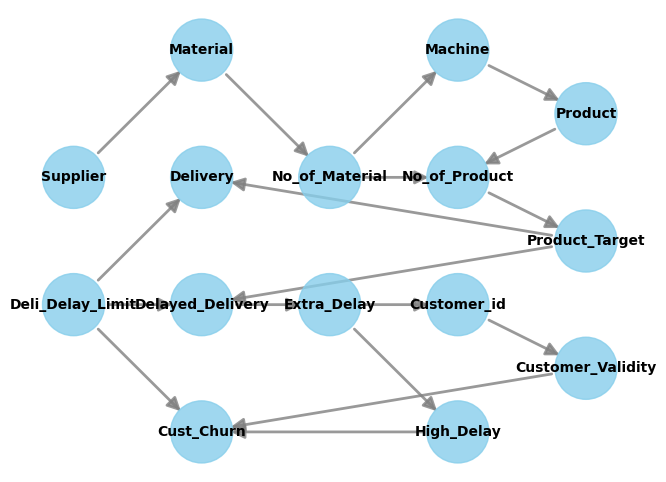

In [52]:
from dowhy import CausalModel
from IPython.display import Image, display
model= CausalModel(
        data = df,
        graph=causal_graph.replace("\n", " "),
        treatment='High_Delay',
        outcome='Cust_Churn')
model.view_model()
#display(Image(filename="dagitty-model.png"))

In [53]:
#Identify the causal effect
estimands = model.identify_effect(proceed_when_unidentifiable=True)
print(estimands)

Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
      d                                 
─────────────(E[Cust_Churn|Extra_Delay])
d[High_Delay]                           
Estimand assumption 1, Unconfoundedness: If U→{High_Delay} and U→Cust_Churn then P(Cust_Churn|High_Delay,Extra_Delay,U) = P(Cust_Churn|High_Delay,Extra_Delay)

### Estimand : 2
Estimand name: iv
No such variable(s) found!

### Estimand : 3
Estimand name: frontdoor
No such variable(s) found!



In [54]:
#Causal Effect Estimation
estimate = model.estimate_effect(estimands,method_name = "backdoor.propensity_score_weighting")
print(estimate)

*** Causal Estimate ***

## Identified estimand
Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
      d                                 
─────────────(E[Cust_Churn|Extra_Delay])
d[High_Delay]                           
Estimand assumption 1, Unconfoundedness: If U→{High_Delay} and U→Cust_Churn then P(Cust_Churn|High_Delay,Extra_Delay,U) = P(Cust_Churn|High_Delay,Extra_Delay)

## Realized estimand
b: Cust_Churn~High_Delay+Extra_Delay
Target units: ate

## Estimate
Mean value: 1.0



Refutation

In [55]:
refutel = model.refute_estimate(estimands,estimate, "random_common_cause")
print(refutel)

Refute: Add a random common cause
Estimated effect:1.0
New effect:1.0
p value:1.0



In [56]:
refutel = model.refute_estimate(estimands,estimate, "data_subset_refuter")
print(refutel)

Refute: Use a subset of data
Estimated effect:1.0
New effect:1.0
p value:1.0



In [57]:
refutel = model.refute_estimate(estimands,estimate, "placebo_treatment_refuter")
print(refutel)

Refute: Use a Placebo Treatment
Estimated effect:1.0
New effect:-0.8805867718897692
p value:0.0



Product_Target - Effect Estimation

In [58]:
#Creating the 
causal_graph = """
digraph {
Supplier;
Material;
No_of_Material;
Machine;
Product;
No_of_Product;
Customer_id;
Product_Target;
Delivery;
Delayed_Delivery;
Deli_Delay_Limit;
Extra_Delay;
High_Delay;
Customer_Validity;
Cust_Churn;
Supplier->Material; Material->No_of_Material; No_of_Material->Machine; Machine->Product; Product->No_of_Product; No_of_Material->No_of_Product; No_of_Product->Product_Target; 
Product_Target->Delivery; Product_Target->Delayed_Delivery;
Deli_Delay_Limit->Delivery; Deli_Delay_Limit->Delayed_Delivery;
Delayed_Delivery->Extra_Delay; Extra_Delay->Customer_id;
Extra_Delay->High_Delay;
Product_Target->Cust_Churn;
Customer_id->Customer_Validity; Customer_Validity->Cust_Churn;
High_Delay->Cust_Churn; Deli_Delay_Limit -> Cust_Churn; 
}
"""
#U[label="Unobserved Confounders"];
##U->Actual_Delay;U->High_Delay;U->Cust_Churn;

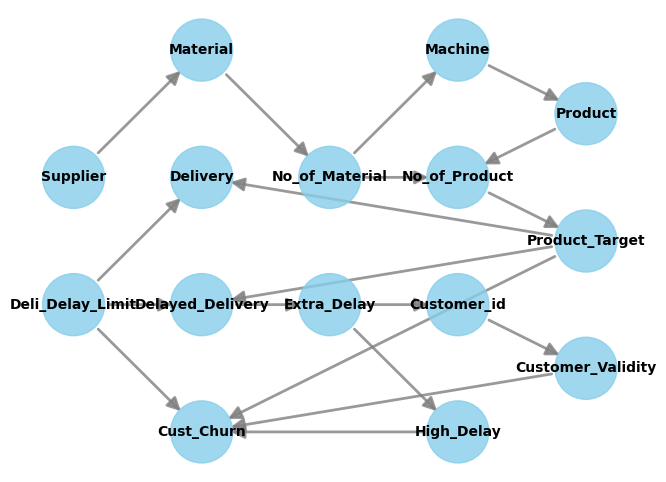

In [59]:
from dowhy import CausalModel
from IPython.display import Image, display
model= CausalModel(
        data = df,
        graph=causal_graph.replace("\n", " "),
        treatment='Product_Target',
        outcome='Cust_Churn')
model.view_model()
#display(Image(filename="dagitty-model-3.png"))

In [60]:
#Identify the causal effect
estimands = model.identify_effect()
print(estimands)

Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
        d                       
─────────────────(E[Cust_Churn])
d[Product_Target]               
Estimand assumption 1, Unconfoundedness: If U→{Product_Target} and U→Cust_Churn then P(Cust_Churn|Product_Target,,U) = P(Cust_Churn|Product_Target,)

### Estimand : 2
Estimand name: iv
Estimand expression:
 ⎡                                                                 -1⎤
 ⎢       d                     ⎛       d                          ⎞  ⎥
E⎢────────────────(Cust_Churn)⋅⎜────────────────([Product_Target])⎟  ⎥
 ⎣d[No_of_Product]             ⎝d[No_of_Product]                  ⎠  ⎦
Estimand assumption 1, As-if-random: If U→→Cust_Churn then ¬(U →→{No_of_Product})
Estimand assumption 2, Exclusion: If we remove {No_of_Product}→{Product_Target}, then ¬({No_of_Product}→Cust_Churn)

### Estimand : 3
Estimand name: frontdoor
No such variable(s) found!

